<a href="https://colab.research.google.com/github/AnxuAafid/ML-implmentations/blob/main/kmeans02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [ ]:
wine_df = pd.read_csv('/content/winequality-red.csv')
wine_df.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6


In [ ]:
wine_df.shape

(1599, 12)

In [ ]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
wine_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Text(0.5, 1.0, 'correlation')

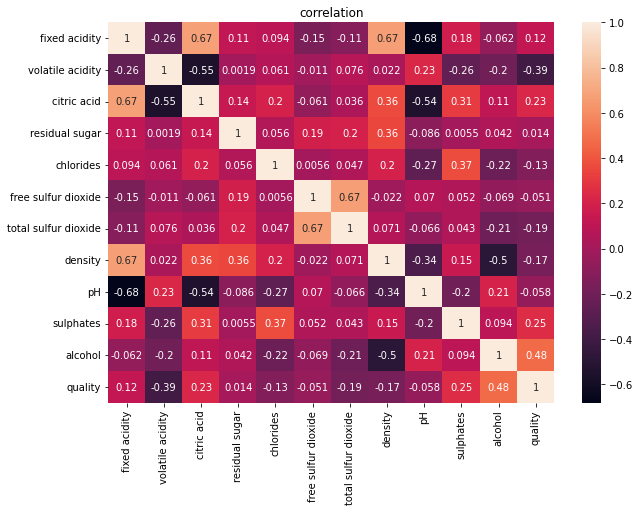

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(wine_df.corr(), annot= True)
plt.title('correlation')

In [ ]:
wine_df=wine_df.drop('quality',axis=1)
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

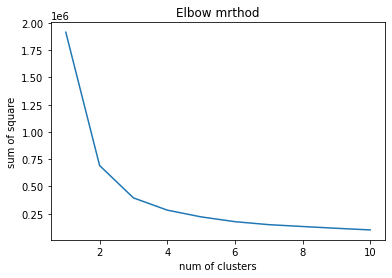

In [ ]:
# elbow methods
wss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(wine_df)
  wss.append(kmeans.inertia_)
plt.plot(range(1,11),wss)
plt.title('Elbow mrthod')
plt.xlabel('num of clusters')
plt.ylabel('sum of square')
plt.show()

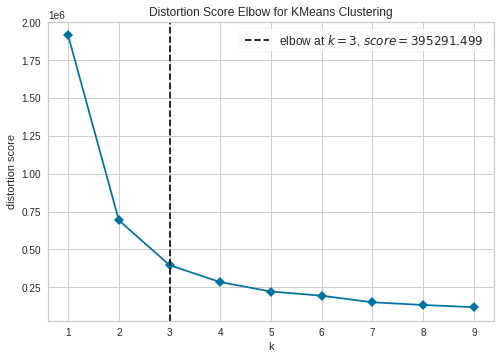

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visul = KElbowVisualizer(model, k=(1,10),timings= False)
visul.fit(wine_df)
visul.show()

In [ ]:
for i in range(2,10):
  kmeans = KMeans(n_clusters=i, max_iter=100)
  kmeans.fit(wine_df)
  score = silhouette_score(wine_df,kmeans.labels_)
  print('for cluster {}, the silhouette score is {}'.format(i,score))

for cluster 2, the silhouette score is 0.6034220347331241
for cluster 3, the silhouette score is 0.5213464032516982
for cluster 4, the silhouette score is 0.48545959739918065
for cluster 5, the silhouette score is 0.44605984677529914
for cluster 6, the silhouette score is 0.44850222651946337
for cluster 7, the silhouette score is 0.39409022349196204
for cluster 8, the silhouette score is 0.3914001774896332
for cluster 9, the silhouette score is 0.3820274544693797


In [ ]:
# pca used for dimension reduction

pca = PCA()
x=pca.fit_transform(wine_df)



In [ ]:
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(x)
unique_labels = np.unique(label)

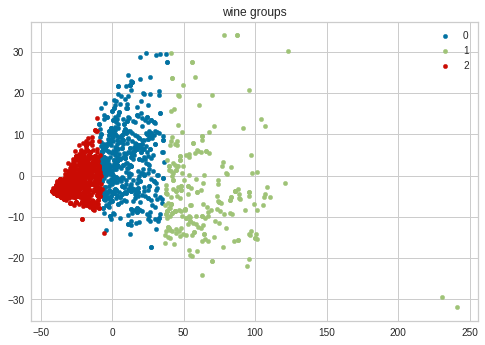

In [ ]:
for i in unique_labels:
  plt.scatter(x[label==i,0],x[label==i,1],label=i,s=20)
plt.legend()
plt.title('wine groups')
plt.show()